# CUSTOMER LIFETIME VALUE ANALYSIS 

## # Objectives :

1) Make a visualization for the distribution of Customer Acquistion Cost
2) Create a visualization for the revenue generated by the customer 
3) compare the cost of acquisiton across various channels and determine which ones are the most and least profitable 
4) find out which channels are most and least effective at converting customers 
5) Calculate the total revenue by channel and analyze the most and least profit channels in terms of generating revenue
6) Calculate the return of investment (ROI) for each channel 


In [3]:
# Importing libraries 

import pandas as pd 
import plotly.express as px 
import plotly.graph_objects as go

In [4]:
df= pd.read_csv(r"C:\Users\Poorvi Asthana\Desktop\Jupyter Files\Data Analytics previous files\Projects\Datasets\customer_acquisition_data.csv")
df

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


## (I) Data cleaning

In [4]:
df.isnull().sum() 

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

## (II) Data visualization  

# #Obj 1 :  Make a visualization for the distribution of Customer Acquistion Cost

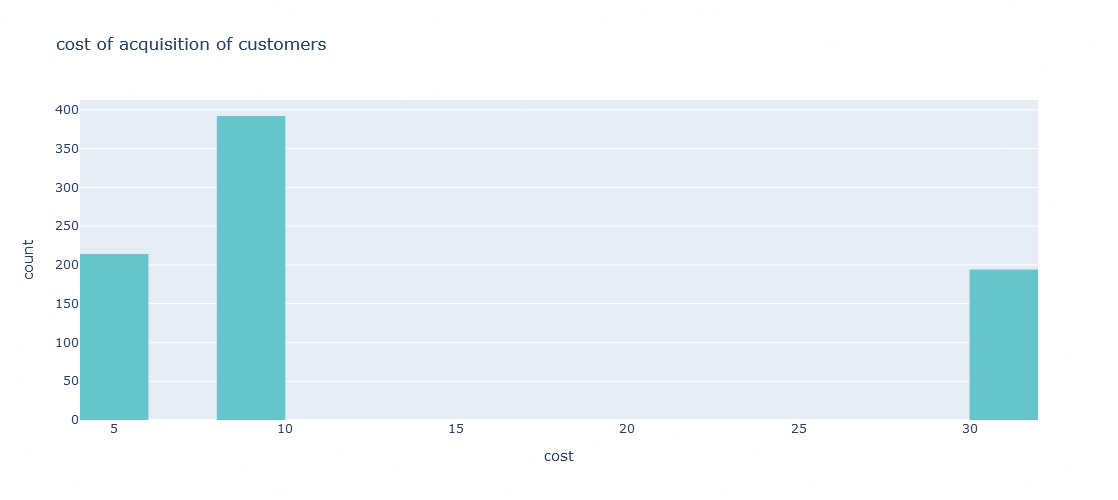

In [6]:
fig_hist= px.histogram(df, 
                       x='cost',  
                       nbins=25, 
                       title= 'cost of acquisition of customers',
                       color_discrete_sequence= px.colors.qualitative.Pastel
                      )

fig_hist.update_layout(width=700, height=500)
fig_hist.show() 


# #Obj 2 : Create a visualization for the revenue generated by the customer

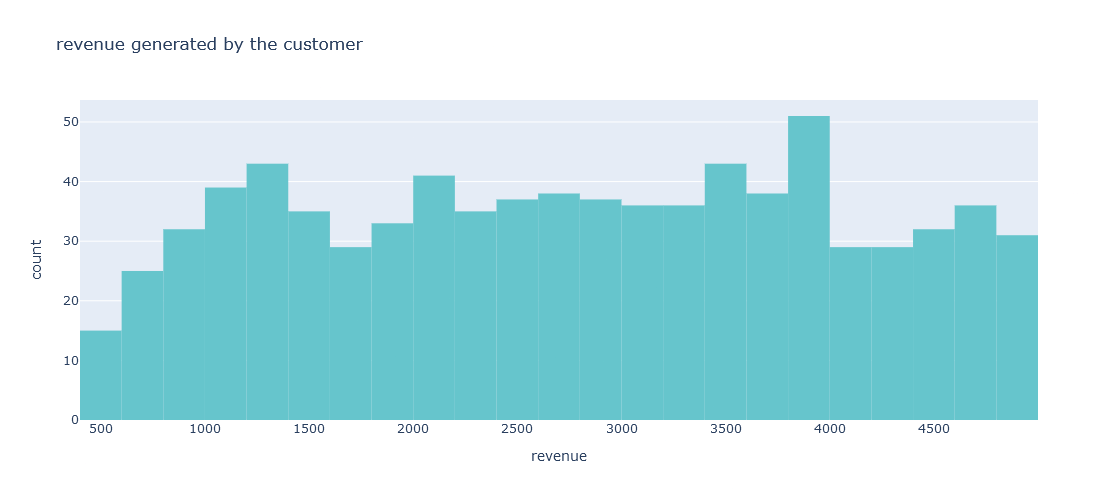

In [17]:
fig1= px.histogram(df, 
                   x='revenue',
                   title= 'revenue generated by the customer',
                   nbins=28,
                
                   color_discrete_sequence=px.colors.qualitative.Pastel,                 
                  
                  )

fig1.update_layout(width=1200, height=500)
fig1.show() 

# #Obj 3: Compare the cost of acquisiton across various channels and determine which ones are the most and least profitable 

In [20]:
# finding counts by channel 

channel_info= df['channel'].value_counts() 
channel_info  

channel
email marketing     214
referral            207
paid advertising    194
social media        185
Name: count, dtype: int64

In [31]:
# aggregating the channels data by mean 

channels_mean= df.groupby('channel')['cost'].mean().reset_index() 
channels_mean 

,channel,cost
0,email marketing,5.246263
1,paid advertising,30.450327
2,referral,8.320327
3,social media,9.546326


### (a) doughnut chart :

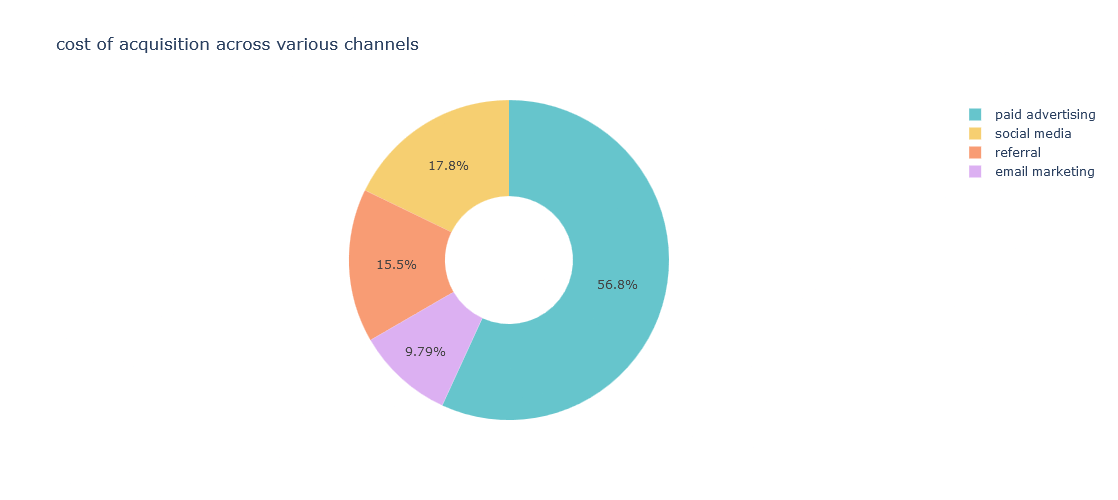

In [32]:
fig_pie= px.pie(channels_mean, 
                names='channel', 
                values='cost', 
                title='cost of acquisition across various channels', 
                hole=0.4, 
                color_discrete_sequence= px.colors.qualitative.Pastel
               )
fig_pie.update_layout(width=700, height=500)
fig_pie.show() 

### (b) bar chart :

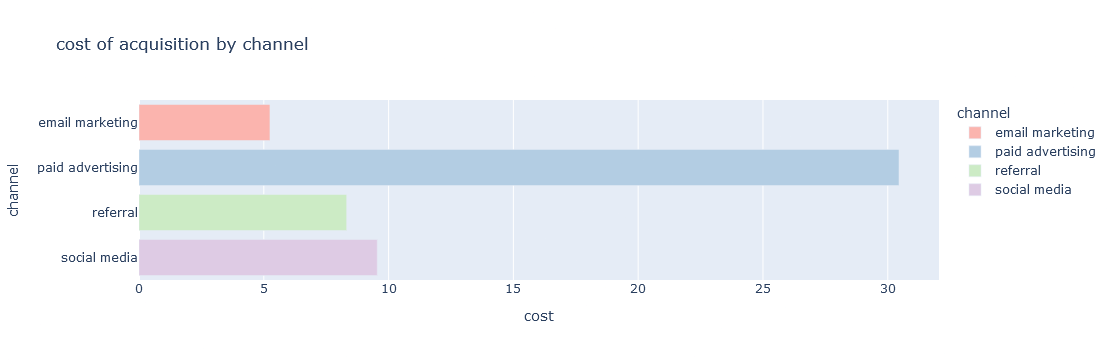

In [44]:
fig2= px.bar(channels_mean, 
             x= 'cost', 
             y='channel',
             title= 'cost of acquisition by channel',
             orientation= 'h',
             color='channel',
             color_discrete_sequence= px.colors.qualitative.Pastel1
            )
#fig2.update_layout(width=1200, height=500)
fig2.show() 

### # Inference of the above result :

"Email marketing" (9.79%) turned out to be the most profitable channel with the least total cost of acquisition  as compared to the 


"Paid advertising" (56.8%) which is the least profitable with the highest total cost of acquisition 


# #Obj 4: Find out which channels are most and least effective at converting customers 

In [45]:
# aggregating the channel by mean of conversion_rates

conversion_data= df.groupby('channel')['conversion_rate'].mean().reset_index()
conversion_data

,channel,conversion_rate
0,email marketing,0.043822
1,paid advertising,0.016341
2,referral,0.123145
3,social media,0.167592


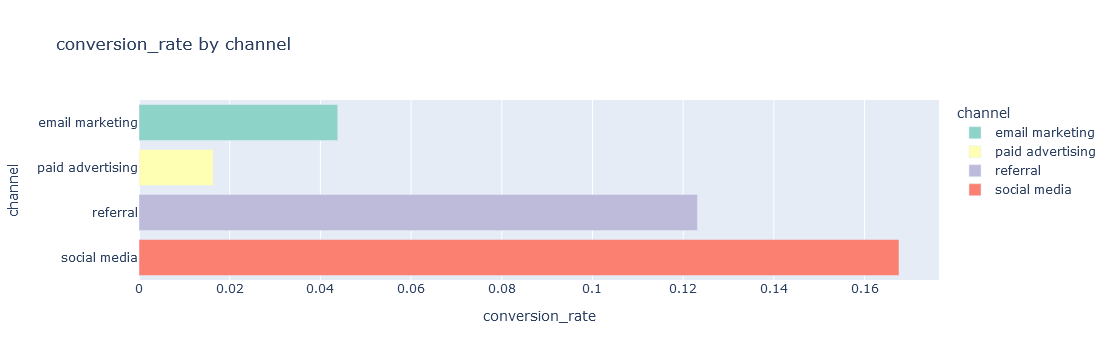

In [53]:
fig4= px.bar(conversion_data, 
             x='conversion_rate',
             y='channel',
             title= 'conversion_rate by channel',
             color='channel',
             color_discrete_sequence= px.colors.qualitative.Set3,
             orientation= 'h'
            )
fig4.show() 

### # Inference :

'Social Media' is the most effective channel of all having the highest conversion_rate  


whereas 


'Paid advertising' being the least effective one having the lowest conversion_rate 

# #Obj 5 : Calculate the total revenue by channel and analyze the most and least profit channels in terms of generating revenue 

In [54]:
df 

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813
796,797,email marketing,5.246263,0.043822,3439
797,798,social media,9.546326,0.167592,2101
798,799,paid advertising,30.450327,0.016341,813


In [55]:
# grouping channes by total revenue 

revenue_by_channel= df.groupby('channel')['revenue'].sum().reset_index()
revenue_by_channel 

,channel,revenue
0,email marketing,604706
1,paid advertising,548396
2,referral,569552
3,social media,492667


#### (a) doughnout chart 

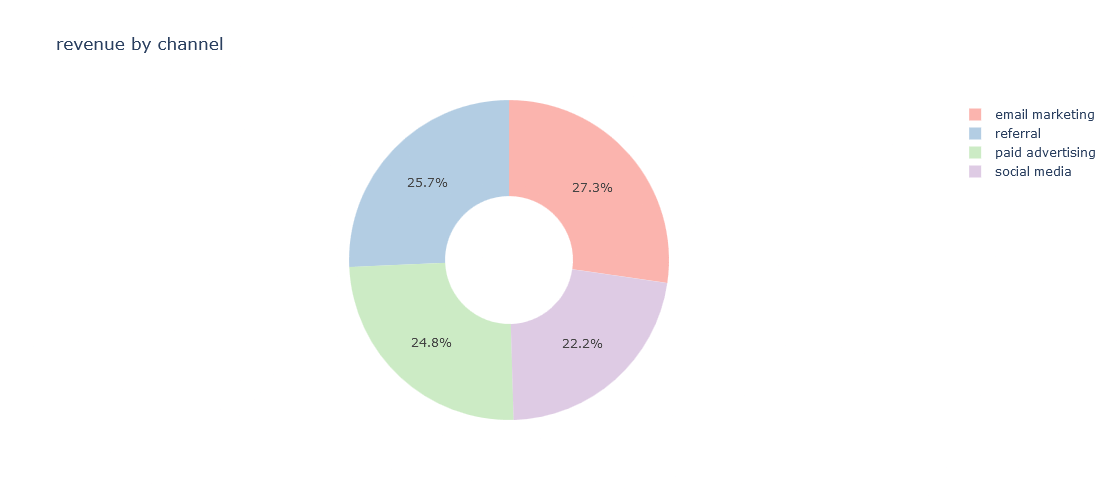

In [61]:
fig5= px.pie(revenue_by_channel, 
             names= 'channel',
             values= 'revenue',
             title= 'revenue by channel',
             hole= 0.4,
             color_discrete_sequence= px.colors.qualitative.Pastel1
            )
fig5.update_layout(width=700, height=500)
fig5.show()

### (b) column chart 

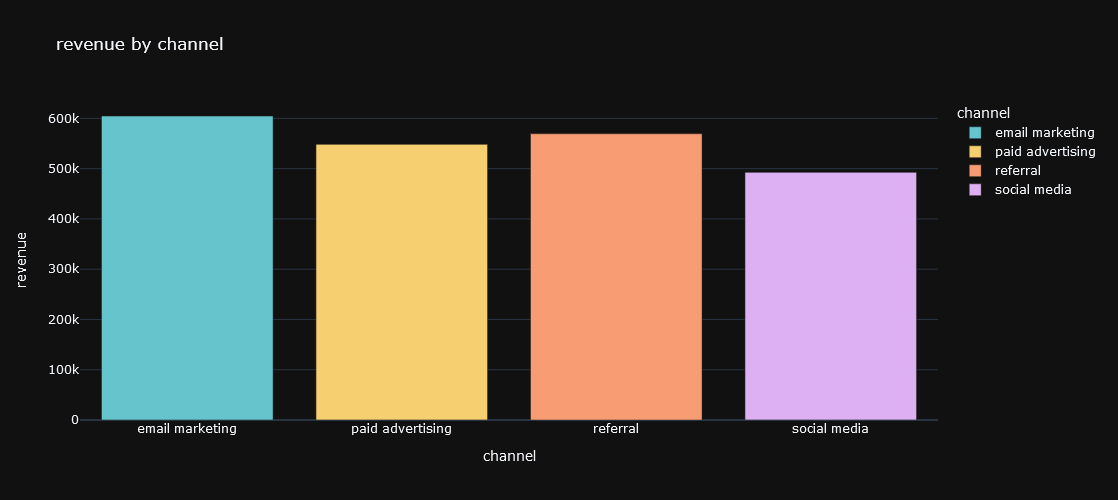

In [64]:
fig6= px.bar(revenue_by_channel, 
             x='channel',
             y='revenue',
             title='revenue by channel',
             color='channel',
             color_discrete_sequence= px.colors.qualitative.Pastel
            )
fig6.update_layout(width=700, height=500, template='plotly_dark')
fig6.show() 

### # Inference : 

"Email marketing" remains to be the most profitable channel with the highest revenue 
on contrary to the

least profitable "Social media"  

# #Obj 6: Calculate the return of investment (ROI) for each channel

In [5]:
# calculating the ROI 

df['ROI']= df['revenue']/ df['cost']
df 

,customer_id,channel,cost,conversion_rate,revenue,ROI
0,1,referral,8.320327,0.123145,4199,504.667681
1,2,paid advertising,30.450327,0.016341,3410,111.985660
2,3,email marketing,5.246263,0.043822,3164,603.095925
3,4,social media,9.546326,0.167592,1520,159.223564
4,5,referral,8.320327,0.123145,2419,290.733775
...,...,...,...,...,...,...
795,796,social media,9.546326,0.167592,2813,294.668347
796,797,email marketing,5.246263,0.043822,3439,655.514186
797,798,social media,9.546326,0.167592,2101,220.084677
798,799,paid advertising,30.450327,0.016341,813,26.699220


In [6]:
# aggregating the channels by mean of ROI

channel_by_roi= df.groupby('channel')['ROI'].mean().reset_index()
channel_by_roi

,channel,ROI
0,email marketing,538.617455
1,paid advertising,92.832615
2,referral,330.691213
3,social media,278.962290


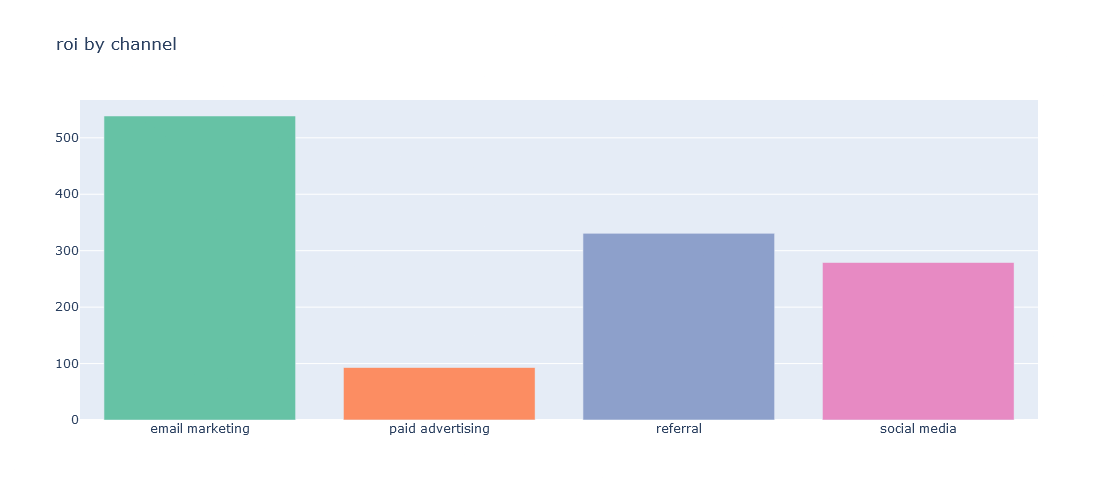

In [8]:
fig6= go.Figure(data=[go.Bar(x=channel_by_roi['channel'],
                             y=channel_by_roi['ROI']
                            )])
fig6.update_layout(title='roi by channel', width=700, height= 500)
fig6.update_traces(marker= dict(color=px.colors.qualitative.Set2)
                  )
fig6.show() 
